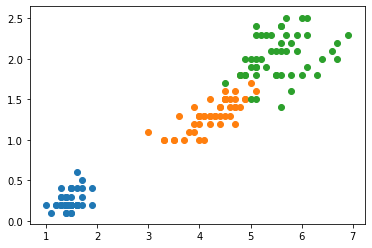

In [14]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[:, 2:]

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()


In [15]:
from collections import Counter
def split(X, y, d, value):
    l_index = X[:, d] < value
    r_index = X[:, d] >= value
    return X[l_index], X[r_index], y[l_index], y[r_index]

def entropy(y):
    res = 0.0
    counter = Counter(y)
    for cnt in counter.values():
        p = cnt/len(y)
        res += -p*np.log(p)
    return res

def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_value = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for v_index in range(1, X.shape[0]):
            if X[sorted_index[v_index],d] != X[sorted_index[v_index-1],d]:
                value = (X[sorted_index[v_index],d] + X[sorted_index[v_index-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, value)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy :
                    best_entropy, best_d, best_value = e, d, value
    print('best_entropy=', best_entropy)
    print('best_d=', best_d)
    print('best_value=', best_value)

    return best_entropy, best_d, best_value

# 第1轮划分
best_entropy, best_d, best_value  = try_split(X, y)
X_l, X_r, y_l, y_r = split(X, y, best_d, best_value)
print(entropy(y_l))
print(entropy(y_r))


best_entropy= 0.46209812037329684
best_d= 0
best_value= 2.45
0.0
0.6931471805599453


In [16]:
# 第2轮划分
best_entropy, best_d, best_value  = try_split(X_r, y_r)



best_entropy= 0.2147644654371359
best_d= 1
best_value= 1.75
